# Factor Analysis - Boston Housing

Boston Housing dataset description: [here](http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xlghtmlframe354.html)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

In [6]:
data = pd.read_csv("bostonh.dat", sep = "\s+", header=None)
print(data.shape)
data.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
xt = data.copy()

for i in [0, 2, 4, 5, 7, 8, 9, 13]:
    xt.iloc[:, i] = np.log(data.iloc[:, i])
    
xt.iloc[:, 1] = data.iloc[:, 1]/10
xt.iloc[:, 6] = (data.iloc[:, 6]**2.5)/10000
xt.iloc[:, 10] = np.exp(0.4 * data.iloc[:, 10])/1000
xt.iloc[:, 11] = (data.iloc[:, 11])/100
xt.iloc[:, 12] = np.sqrt(data.iloc[:, 12])

data = xt.drop(3, axis=1)

In [13]:
cols = []
for i in [1, 2, 3] + list(range(5, 15)):
    cols.append("X" + str(i))
data.columns = cols
data.head()

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,-5.064036,1.8,0.837248,-0.619897,1.883275,3.432567,1.408545,0.000000,5.690359,0.454865,3.9690,2.231591,3.178054
1,-3.600502,0.0,1.955860,-0.757153,1.859574,5.529585,1.602836,0.693147,5.488938,1.236450,3.9690,3.023243,3.072693
2,-3.601235,0.0,1.955860,-0.757153,1.971996,2.918119,1.602836,0.693147,5.488938,1.236450,3.9283,2.007486,3.546740
3,-3.430523,0.0,0.779325,-0.780886,1.945624,1.419592,1.802073,1.098612,5.402677,1.772241,3.9463,1.714643,3.508556
4,-2.672924,0.0,0.779325,-0.780886,1.966693,2.162710,1.802073,1.098612,5.402677,1.772241,3.9690,2.308679,3.589059


In [17]:
da  = (data - np.mean(data))/np.std(data) 
dat = da.corr()

## Maximum Likelihood Factor Analysis without varimax rotation factanal performs

In [37]:
mlm = FactorAnalysis(n_components=3).fit(da)
# Loadingss
ld = mlm.components_

# Communalities
com = np.diag(np.dot(ld.T, ld))

# Specific variances Psi
psi = np.diag(dat) - com


tbl = pd.DataFrame({"ld1": ld[0], "ld2": ld[1], "ld3": ld[2], "com": com, "psi": psi}, 
                   columns = ["ld1", "ld2", "ld3", "com", "psi"])
tbl["variables"] = [
    "CRIM", "ZN", "INDUS", "NOXSQ", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
    "LSTAT", "MEDV"
]
tbl

,ld1,ld2,ld3,com,psi,variables
0,0.929328,0.165250,-0.114215,0.904003,0.095997,CRIM
1,-0.583114,0.037848,-0.288986,0.424967,0.575033,ZN
2,0.819616,-0.029415,0.135094,0.690885,0.309115,INDUS
3,0.879627,0.099869,0.268998,0.856078,0.143922,NOXSQ
4,-0.444686,0.533156,0.038369,0.483473,0.516527,RM
5,0.784815,-0.014604,0.353006,0.740761,0.259239,AGE
6,-0.830646,-0.157767,-0.408359,0.881621,0.118379,DIS
7,0.793976,0.303822,-0.406827,0.888214,0.111786,RAD
8,0.825347,0.140216,-0.293848,0.787206,0.212794,TAX
9,0.504559,-0.184344,-0.156763,0.313137,0.686863,PTRATIO


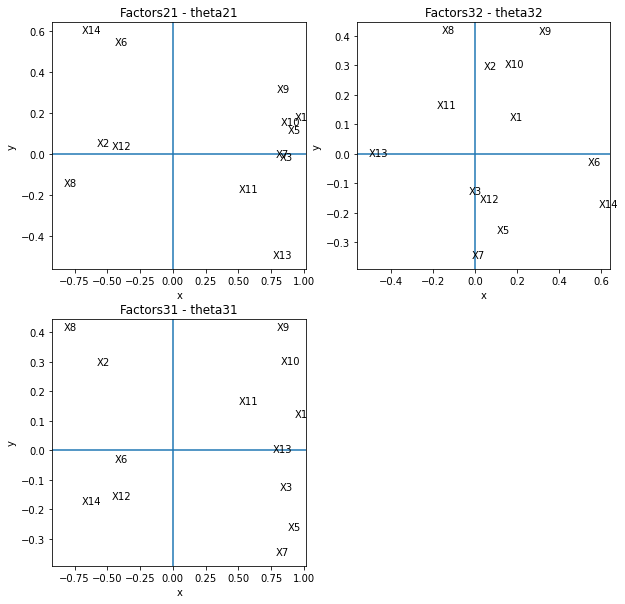

In [26]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# plot first factor against second
axes[0, 0].scatter(ld[0], ld[1], c = "w")
for i in range(0, len(cols)):
    axes[0, 0].text(ld[0][i], ld[1][i], cols[i])
axes[0, 0].set_ylim(axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].set_xlim(axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].vlines(0, axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].hlines(0, axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_title("Factors21 - theta21")

# plot second factor against third
axes[0, 1].scatter(ld[1], -ld[2], c = "w")
for i in range(0, len(cols)):
    axes[0, 1].text(ld[1][i], -ld[2][i], cols[i])
axes[0, 1].set_ylim(axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].set_xlim(axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].vlines(0, axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].hlines(0, axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].set_title("Factors32 - theta32")

# plot first factor against third
axes[1, 0].scatter(ld[0], -ld[2], c = "w")
for i in range(0, len(cols)):
    axes[1, 0].text(ld[0][i], -ld[2][i], cols[i])
axes[1, 0].set_ylim(axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].set_xlim(axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].vlines(0, axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].hlines(0, axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Factors31 - theta31")

fig.delaxes(axes[1,1])

plt.show()

## Maximum Likelihood Factor Analysis after varimax rotation

In [27]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = np.eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u,s,vh = np.linalg.svd(np.dot(Phi.T,np.asarray(Lambda)**3 - (gamma/p) * np.dot(Lambda, np.diag(np.diag(np.dot(Lambda.T,Lambda))))))
        R = np.dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return np.dot(Phi, R)

In [38]:
load = varimax(ld.T)

vl = pd.DataFrame({"0": -load[:,2], "1": load[:,1], "2": -load[:,0]})

com = np.diag(np.dot(vl, vl.T))

psi = np.diag(dat) - com

tbl = pd.DataFrame({"ld1": -load[:,2], "ld2": load[:,1], "ld3": -load[:,0], "com": com, "psi": psi}, 
                   columns = ["ld1", "ld2", "ld3", "com", "psi"])
tbl["variables"] = [
    "CRIM", "ZN", "INDUS", "NOXSQ", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
    "LSTAT", "MEDV"
]
tbl

,ld1,ld2,ld3,com,psi,variables
0,0.718912,-0.281018,-0.555155,0.904003,0.095997,CRIM
1,-0.152356,0.239773,0.586740,0.424967,0.575033,ZN
2,0.402938,-0.362230,-0.630330,0.690885,0.309115,INDUS
3,0.407700,-0.251626,-0.791544,0.856078,0.143922,NOXSQ
4,-0.068208,0.671981,0.165113,0.483473,0.516527,RM
5,0.244453,-0.296770,-0.770020,0.740761,0.259239,AGE
6,-0.310856,0.155312,0.872277,0.881621,0.118379,DIS
7,0.888230,-0.149259,-0.277459,0.888214,0.111786,RAD
8,0.762325,-0.288139,-0.350775,0.787206,0.212794,TAX
9,0.334043,-0.410578,-0.181598,0.313137,0.686863,PTRATIO


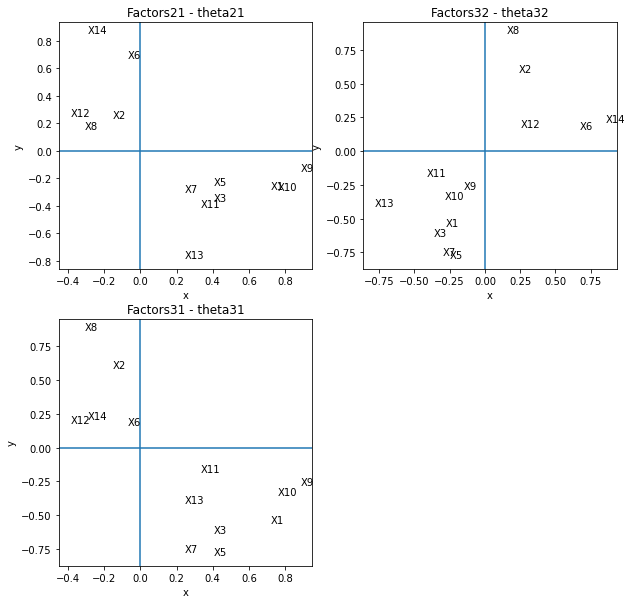

In [29]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# plot first factor against second
axes[0, 0].scatter(vl.iloc[:, 0], vl.iloc[:, 1], c = "w")
for i in range(0, len(cols)):
    axes[0, 0].text(vl.iloc[:, 0][i], vl.iloc[:, 1][i], cols[i])
axes[0, 0].set_ylim(axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].set_xlim(axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].vlines(0, axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].hlines(0, axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_title("Factors21 - theta21")

# plot second factor against third
axes[0, 1].scatter(vl.iloc[:, 1], vl.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[0, 1].text(vl.iloc[:, 1][i], vl.iloc[:, 2][i], cols[i])
axes[0, 1].set_ylim(axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].set_xlim(axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].vlines(0, axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].hlines(0, axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].set_title("Factors32 - theta32")

# plot first factor against third
axes[1, 0].scatter(vl.iloc[:, 0], vl.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[1, 0].text(vl.iloc[:, 0][i], vl.iloc[:, 2][i], cols[i])
axes[1, 0].set_ylim(axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].set_xlim(axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].vlines(0, axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].hlines(0, axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Factors31 - theta31")

fig.delaxes(axes[1,1])

plt.show()

## Principal Component Method after varimax rotation spectral decomposition

In [39]:
e = np.linalg.eig(dat)
eigval = e[0][:3]
eigvec = e[1][:,:3].T
E = np.tile(np.array(eigval), (len(dat), 1))
Q = np.sqrt(E) * eigvec.T
load = varimax(Q)
ld = pd.DataFrame({"0": load[:,0], "1": -load[:,1], "2": load[:,2]})
com = np.diag(np.dot(ld, ld.T))
psi = np.diag(dat) - com
tbl = pd.DataFrame({"ld1": load[:,0], "ld2": -load[:,1], "ld3": load[:,2], "com": com, "psi": psi}, 
                   columns = ["ld1", "ld2", "ld3", "com", "psi"])
tbl["variables"] = [
    "CRIM", "ZN", "INDUS", "NOXSQ", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
    "LSTAT", "MEDV"
]

tbl

,ld1,ld2,ld3,com,psi,variables
0,0.605289,-0.243827,0.685315,0.895483,0.104517,CRIM
1,-0.772059,0.263311,0.026156,0.666091,0.333909,ZN
2,0.719246,-0.369226,0.343884,0.771899,0.228101,INDUS
3,0.794751,-0.203243,0.423330,0.852146,0.147854,NOXSQ
4,-0.159881,0.858620,0.019946,0.763189,0.236811,RM
5,0.790226,-0.236856,0.265464,0.751029,0.248971,AGE
6,-0.857054,0.131008,-0.321987,0.855380,0.144620,DIS
7,0.370313,-0.124656,0.800507,0.793481,0.206519,RAD
8,0.376544,-0.258378,0.782131,0.820272,0.179728,TAX
9,0.199061,-0.511483,0.338026,0.415501,0.584499,PTRATIO


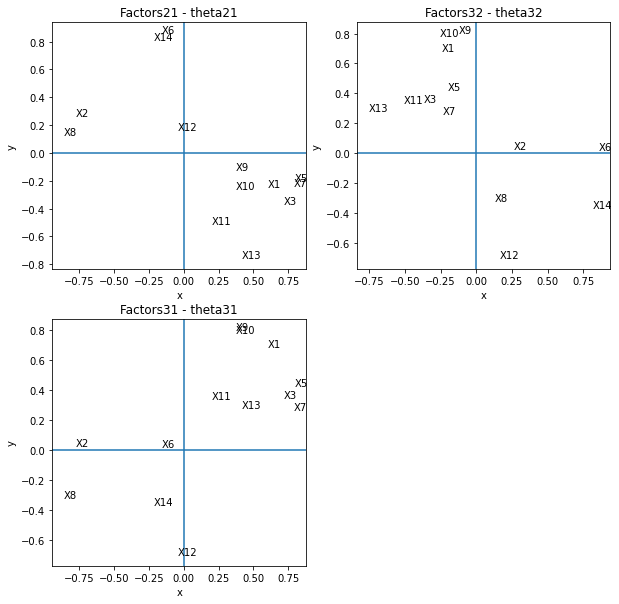

In [33]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# plot first factor against second
axes[0, 0].scatter(ld.iloc[:, 0], ld.iloc[:, 1], c = "w")
for i in range(0, len(cols)):
    axes[0, 0].text(ld.iloc[:, 0][i], ld.iloc[:, 1][i], cols[i])
axes[0, 0].set_ylim(axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].set_xlim(axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].vlines(0, axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].hlines(0, axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_title("Factors21 - theta21")

# plot second factor against third
axes[0, 1].scatter(ld.iloc[:, 1], ld.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[0, 1].text(ld.iloc[:, 1][i], ld.iloc[:, 2][i], cols[i])
axes[0, 1].set_ylim(axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].set_xlim(axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].vlines(0, axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].hlines(0, axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].set_title("Factors32 - theta32")

# plot first factor against third
axes[1, 0].scatter(ld.iloc[:, 0], ld.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[1, 0].text(ld.iloc[:, 0][i], ld.iloc[:, 2][i], cols[i])
axes[1, 0].set_ylim(axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].set_xlim(axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].vlines(0, axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].hlines(0, axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Factors31 - theta31")

fig.delaxes(axes[1,1])

plt.show()



## Principal Factor Method after varimax rotation inverse of the correlation matrix

In [40]:
f = np.linalg.inv(dat)
psiini = np.diag(1/np.diagonal(f)) # preliminary estimate of psi
psi = psiini.copy()

for i in range(1, 11):
    ee = np.linalg.eig(dat - psi)
    eigval = ee[0][:3]
    eigvec = ee[1][:,:3].T
    EE = np.tile(np.array(eigval), (len(dat), 1))
    QQ = np.sqrt(EE) * eigvec.T
    psiold = psi.copy()
    psi = np.diag(1 - sum((QQ * QQ).T))
    i += 1
    z = psi - psiold
    convergence = np.diagonal(z)

load = varimax(QQ)
ld = pd.DataFrame({"0": -load[:,0], "1": load[:,1], "2": load[:,2]})
com = np.diag(np.dot(ld, ld.T))
psi = np.diag(dat) - com
tbl = pd.DataFrame({"ld1": -load[:,0], "ld2": load[:,1], "ld3": load[:,2], "com": com, "psi": psi}, 
                   columns = ["ld1", "ld2", "ld3", "com", "psi"])
tbl["variables"] = [
    "CRIM", "ZN", "INDUS", "NOXSQ", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
    "LSTAT", "MEDV"
]
tbl

,ld1,ld2,ld3,com,psi,variables
0,0.559684,-0.272771,0.723483,0.911077,0.088923,CRIM
1,-0.617028,0.268820,-0.111777,0.465483,0.534517,ZN
2,0.658993,-0.384647,0.379978,0.726608,0.273392,INDUS
3,0.779484,-0.239048,0.423173,0.843815,0.156185,NOXSQ
4,-0.175143,0.679560,-0.050643,0.495042,0.504958,RM
5,0.743810,-0.278117,0.272439,0.704825,0.295175,AGE
6,-0.861936,0.155366,-0.322179,0.870872,0.129128,DIS
7,0.299089,-0.156022,0.837781,0.815673,0.184327,RAD
8,0.319433,-0.284933,0.805735,0.832434,0.167566,TAX
9,0.217309,-0.401822,0.316646,0.308949,0.691051,PTRATIO


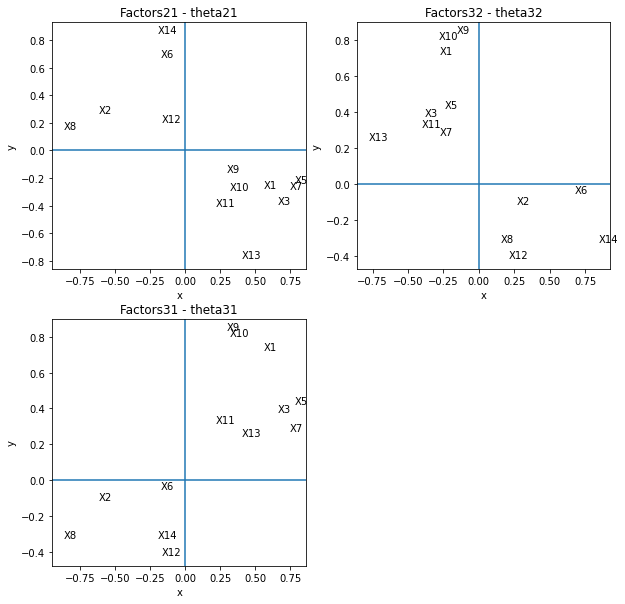

In [35]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# plot first factor against second
axes[0, 0].scatter(ld.iloc[:, 0], ld.iloc[:, 1], c = "w")
for i in range(0, len(cols)):
    axes[0, 0].text(ld.iloc[:, 0][i], ld.iloc[:, 1][i], cols[i])
axes[0, 0].set_ylim(axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].set_xlim(axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].vlines(0, axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].hlines(0, axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_title("Factors21 - theta21")

# plot second factor against third
axes[0, 1].scatter(ld.iloc[:, 1], ld.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[0, 1].text(ld.iloc[:, 1][i], ld.iloc[:, 2][i], cols[i])
axes[0, 1].set_ylim(axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].set_xlim(axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].vlines(0, axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].hlines(0, axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].set_title("Factors32 - theta32")

# plot first factor against third
axes[1, 0].scatter(ld.iloc[:, 0], ld.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[1, 0].text(ld.iloc[:, 0][i], ld.iloc[:, 2][i], cols[i])
axes[1, 0].set_ylim(axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].set_xlim(axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].vlines(0, axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].hlines(0, axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Factors31 - theta31")

fig.delaxes(axes[1,1])

plt.show()

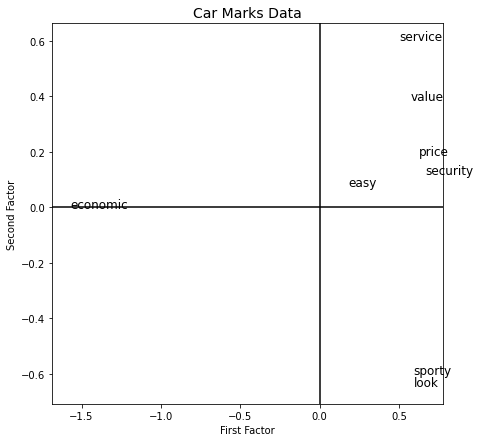

In [41]:
xdat = pd.read_csv("carmean.dat", sep = "\s+", header=None)
x = xdat.iloc[:, 1:]
x.columns = ["economic", "service", "value", "price", "look", "sporty", 
             "security", "easy"]

r = x.corr()
m = r.copy()
np.fill_diagonal(m.values, 0)
psi = np.ones((8, 8))
np.fill_diagonal(psi, 1 - np.abs(m).max())

ee, vv = np.linalg.eig(r - psi)
vv = vv[:, 1:3]
q1 = np.sqrt(ee[1])*vv[:, 0]
q2 = np.sqrt(ee[2])*vv[:, 1]


fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(-q1, q2, c = "w")

for i in range(len(x.columns)):
    ax.text(-q1[i], q2[i], x.columns[i], fontsize = 12)

ax.axvline(0, c = "k")
ax.axhline(0, c = "k")

ax.set_xlabel("First Factor")
ax.set_ylabel("Second Factor")
plt.title("Car Marks Data", fontsize = 14)

plt.show()

In [42]:
np.array(sorted(ee))[::-1]

array([ 4.6277518 ,  1.3401931 ,  1.20084204,  1.04536451,  1.0070103 ,
        0.99300234,  0.97994134, -4.02778267])

In [67]:
r = 1.12145
((4.6277518**r) + (1.3401931**r))/8

0.8703585806746506